# PYOMO
[Source: https://pyomo.readthedocs.io/en/stable/pyomo_overview/simple_examples.html ]

[Source: https://www.ima.umn.edu/materials/2017-2018.2/W8.21-25.17/26326/3_PyomoFundamentals.pdf ]

To check Linear Programming results

[Source: https://www.wolframalpha.com/widgets/view.jsp?id=daa12bbf5e4daec7b363737d6d496120 ]

## Steps
### install pyomo --> pip install pyomo

### Install the glpk solver
--> Then, download WinGLPK 4.55 from here: WinGLPK (https://sourceforge.net/projects/winglpk/files/winglpk/GLPK-4.55/winglpk-4.55.zip/download)
    
--> This does not work for newer versions at the moment.

--> Unzip it and copy the whole w64 folder to C:\w64\w64

--> Include folder C:\w64\w64 in your system PATH (so that glpsol.exe is found).


# Concrete versus Abstract Model

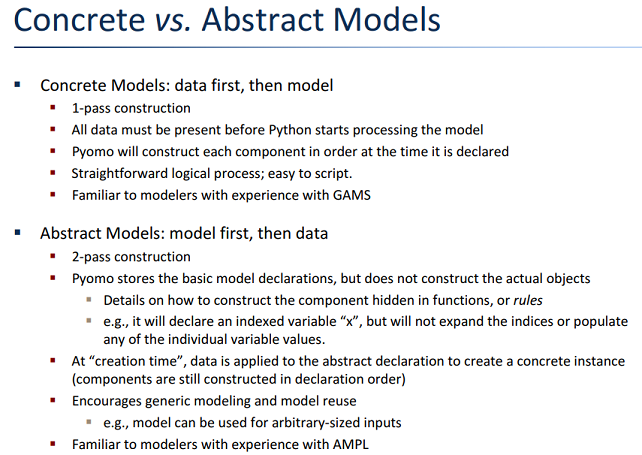

# Concrete Example

-- save this to concrete.py

-- @cmd, run: pyomo solve concrete.py --solver=glpk --summary

-- This will create: results.json


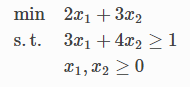


In [1]:
# Concrete Example
import pyomo.environ as pyo

model = pyo.ConcreteModel()

# two variables: x[1] and x[2], they are both Real Numbers and NonNegative
model.x = pyo.Var([1,2], domain=pyo.NonNegativeReals)

# The Objective Function
model.OBJ = pyo.Objective(expr = 2*model.x[1] + 3*model.x[2])

# The constraint
model.Constraint1 = pyo.Constraint(expr = 3*model.x[1] + 4*model.x[2] >= 1)

# Abstract Example

-- save abstract.py and abstract.dat

-- @cmd run: pyomo solve abstract.py abstract.dat --solver=glpk --summary

-- this will create: results.json

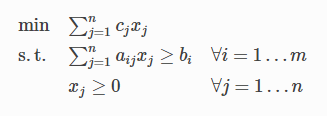

In [2]:
# Abstract Example
# save this to abstract.py

from __future__ import division #The first import line is used to ensure that int or long division arguments are converted to floating point values before division is performed.
import pyomo.environ as pyo

model = pyo.AbstractModel()

# Determine the limit of each of the variables (i and j)
# These are m and n and are nonnegativeintegers
model.m = pyo.Param(within=pyo.NonNegativeIntegers) #within means that it does checking if variables are nonnegativeintegers
model.n = pyo.Param(within=pyo.NonNegativeIntegers)

# Now we state the ranges of the I and J variables
# Each is from 1 to max of m or n
model.I = pyo.RangeSet(1, model.m)
model.J = pyo.RangeSet(1, model.n)

# Now for the parameters in the equations: a,b,c
# Determine what ranges (I or J) each ont does
model.a = pyo.Param(model.I, model.J)
model.b = pyo.Param(model.I)
model.c = pyo.Param(model.J)

# the next line declares a variable indexed by the set J
# this is the variable x. It uses the "J" range, and it is nonnegative real
model.x = pyo.Var(model.J, domain=pyo.NonNegativeReals)

# This is a function to calculate the value of the objective function
def obj_expression(m):
    return pyo.summation(m.c, m.x)

# Pass the obj_expression to OBJ in order to make it known
model.OBJ = pyo.Objective(rule=obj_expression)

# This is the function for the constraint
def ax_constraint_rule(m, i):
    # return the expression for the constraint for i
    return sum(m.a[i,j] * m.x[j] for j in m.J) >= m.b[i]

# Add the contraint to the contraint fuction
# the next line creates one constraint for each member of the set model.I
model.AxbConstraint = pyo.Constraint(model.I, rule=ax_constraint_rule)

In [ ]:
# Abstract Example
# save this to abstract.dat
param m := 1 ;
param n := 2 ;

param a :=
1 1 3
1 2 4
;

param c:=
1 2
2 3
;

param b := 1 1 ;